In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
from sklearn import datasets
iris = datasets.load_iris()

In [91]:
#help(datasets)

In [92]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [93]:
iris.data[50:54]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3]])

In [94]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
# Create Dataframe from iris feature data with column name
df = pd.DataFrame(iris.data, columns=['sepal_l', 'sepal_w', 'petal_l', 'petal_w'])
df.head()

,sepal_l,sepal_w,petal_l,petal_w
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [96]:
# check if there are Nan value in dataframe of iris data
df.notnull().sum()

sepal_l    150
sepal_w    150
petal_l    150
petal_w    150
dtype: int64

In [97]:
# display statisc data (mean, std, min, max ...) of dataframe
df.describe()
# mean(), std(), min(), max() function returns each value

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [98]:
# concatenate target data to a new column
#pd.concat([df, pd.Series(iris.target)])
df2 = df.merge(pd.DataFrame(iris.target, columns=['target']),left_index=True, right_index=True)
df2.head()

,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [99]:
# Select target:0 and crete new dataframe
# step-1, retrieve target column as a series
#df2['target']
# another syntax
df2.target

# step-2, perfrom logical operation on the series, result: series of logical value
df2['target'] == 0

# step-3, use above array of logical value to select records(row)
iris0 = df2[df2.target==0]
iris1 = df2[df2.target==1]
iris2 = df2[df2.target==2]

In [100]:
iris0.describe()

,sepal_l,sepal_w,petal_l,petal_w,target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,5.00600,3.418000,1.464000,0.24400,0.0
std,0.35249,0.381024,0.173511,0.10721,0.0
min,4.30000,2.300000,1.000000,0.10000,0.0
25%,4.80000,3.125000,1.400000,0.20000,0.0
50%,5.00000,3.400000,1.500000,0.20000,0.0
75%,5.20000,3.675000,1.575000,0.30000,0.0
max,5.80000,4.400000,1.900000,0.60000,0.0


In [101]:
iris1.describe()

,sepal_l,sepal_w,petal_l,petal_w,target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [102]:
iris2.describe()

,sepal_l,sepal_w,petal_l,petal_w,target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


In [103]:
# splitting training and testing data using random permutation
# 50 for testing, 100 for training

rnd_index = np.random.permutation(150)
test_idx = rnd_index[:50]
train_idx = rnd_index[50:]
# print(train_idx, test_idx)

# select data using iloc method
X_test = df.iloc[test_idx]
X_train = df.iloc[train_idx]

#X_test.describe()
#X_train.describe()

# define DataFrame of LABEL
df_target = pd.DataFrame(iris.target, columns=['target'])

# we can use same index for y (LABEL) ; expected result
y_test = df_target.iloc[test_idx]
y_train = df_target.iloc[train_idx]

y_test.head()

,target
68,1
113,2
131,2
103,2
86,1


In [104]:
X_test.head()

,sepal_l,sepal_w,petal_l,petal_w
68,6.2,2.2,4.5,1.5
113,5.7,2.5,5.0,2.0
131,7.9,3.8,6.4,2.0
103,6.3,2.9,5.6,1.8
86,6.7,3.1,4.7,1.5


In [147]:
# Split data with sklearn test_data_split
from sklearn.model_selection import train_test_split

# train:test = 70:30 - 80:20
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

In [148]:
# It's possible to use pandas DF as input data
#ser_target = pd.Series(iris.target)
#from sklearn.utils.validation import column_or_1d
#X_train, X_test, y_train, y_test = train_test_split(df, ser_target, test_size=0.2)
# or use df.values attribute which is numpy array of the data of DataFrame
#X_train, X_test, y_train, y_test = train_test_split(df.values, ser_target.values, test_size=0.25)

In [149]:
print('Size of training:', len(X_train), len(y_train), '  Size of testing:', len(X_test), len(y_test))

Size of training: 90 90   Size of testing: 60 60


In [150]:
# apply logistic regression

from sklearn.linear_model import LogisticRegression # We can choose other algorithm easily
clf = LogisticRegression() # We can override parameter
from sklearn.linear_model import LogisticRegressionCV # We can choose other algorithm easily
#clf = LogisticRegressionCV(Cs=[0.1, 1, 10, 100,1000], solver='newton-cg', max_iter=10000) # We can override parameters
from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier()
from sklearn.neural_network import MLPClassifier
#clf = MLPClassifier()
from sklearn.svm import SVC
clf = SVC()

clf.fit(X_train, y_train)  # fit model: adjust parameter
#svc.fit(X_train, y_train)  # fit model: adjust parameter

# measure the accuracy on testing data
p_test = clf.predict(X_test)
#p_svc = clf.predict(X_test)
print('Predicted', p_test)
print('Expected ', y_test)
#print('Pred SVC', p_svc)


clf  # check which parameter can be specified

Predicted [2 2 0 0 1 1 0 2 1 2 1 0 0 0 0 2 1 1 0 1 2 1 0 1 2 0 0 2 1 0 0 1 0 2 1 2 1
 0 0 2 2 2 0 1 0 0 1 2 2 1 2 0 2 0 1 2 1 1 1 1]
Expected  [2 2 0 0 1 1 0 2 1 2 1 0 0 0 0 2 1 1 0 1 2 1 0 1 2 0 0 2 1 0 0 1 0 2 1 2 1
 0 0 2 2 2 0 1 0 0 1 2 2 1 2 0 2 0 1 2 1 1 1 2]


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Algorithm(estimator) choosing guide of scikit-learn

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [151]:
# Calculate accuracy of predicted testing data. (accuracy: number_of_correct_answer/number_of_testing_data)

match_count = 0
for i in range(len(p_test)):  #loop from 0 to 30-1 (total 30 loop)
    if p_test[i] == y_test[i]:
        match_count += 1
print(match_count / len(p_test))

0.9833333333333333


In [152]:
(y_test == p_test).mean()

0.9833333333333333

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, p_test)

0.9733333333333334

In [153]:
# Calculate accuracy of predicted training data
p_train = clf.predict(X_train)
(y_train == p_train).mean()

0.9888888888888889

# Learning Curve and Cross Validation

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
https://scikit-learn.org/stable/modules/cross_validation.html

See also Corsera machine learning, lecture-10.

In [157]:
# Separate Training data to Training + Cross Validation
# Train: CV: Testing = 60:20:20
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.25)
train_size = list(range(len(y_tr) // 10, len(y_tr) + 1, len(y_tr) // 10))
train_score = list()
cv_score = list()

for t_size in train_size:
    #print('fitting with training size:', t_size)
    clf.fit(X_tr[:t_size], y_tr[:t_size])
    p_tr = clf.predict(X_tr[:t_size])
    p_cv = clf.predict(X_cv)
    train_score.append(round((y_tr[:t_size] == p_tr).mean(), 3))
    cv_score.append(round((y_cv == p_cv).mean(), 3))
    #print('Trainign score:', round((y_tr == p_tr).mean(),3), end='  ')
    #print('CV score:', round((y_cv == p_cv).mean(),3))

In [112]:
# Modified version, test 10 times
# Separate Training data to Training + Cross Validation
# Train: CV: Testing = 60:20:20
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.25)
train_size = list(range(len(y_tr) // 10, len(y_tr) + 1, len(y_tr) // 10))
train_score = list()
cv_score = list()

for t_size in train_size:
    #print('fitting with training size:', t_size)
    tr_result = list()
    cv_result = list()
    for i in range(1):
        clf.fit(X_tr[:t_size], y_tr[:t_size])
        p_tr = clf.predict(X_tr)
        p_cv = clf.predict(X_cv)
        tr_result.append((y_tr == p_tr).mean())
        cv_result.append((y_cv == p_cv).mean())
    train_score.append(round(np.mean(tr_result), 3))
    cv_score.append(round(np.mean(tr_result) , 3))
    #print('Trainign score:', round((y_tr == p_tr).mean(),3), end='  ')
    #print('CV score:', round((y_cv == p_cv).mean(),3))

In [155]:
train_size

[6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66]

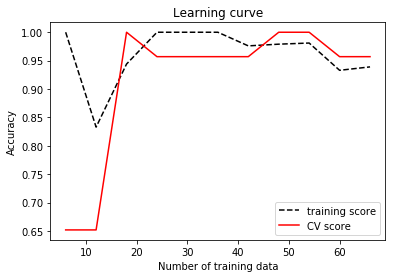

In [158]:
# plot learning curve
#plt.hold(True)
plt.figure()
plt.plot(train_size, train_score, 'k--', label='training score')
plt.plot(train_size, cv_score, 'r-', label='CV score')
plt.legend(loc='best')
plt.title('Learning curve')
plt.xlabel('Number of training data')
plt.ylabel('Accuracy')
plt.show()

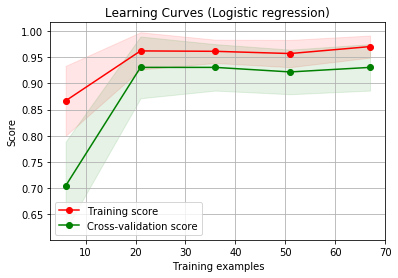

In [159]:
# Learning curve using the sample of scikit-learn
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Logistic regression)"
# cv = ShuffleSplit(n_splits=2, test_size=0.25, random_state=0)
cv = ShuffleSplit(n_splits=5, test_size=0.25)
plot_learning_curve(clf, title, X_train, y_train, cv=cv, n_jobs=4)

plt.show()

## Add new future using pandas DataFrame

1. ratio of petal length and petal width (petal_l / petal_w)
2. ratio of sepal length and sepal width (sepal_l / sepal_w)
3. and more...

In [116]:
df['petal_w2'] = df['petal_w'] * df['petal_w']
df['sepal_r'] = df['sepal_l'] / df['sepal_w']
df['petal_r'] = df['petal_l'] / df['petal_w']
df['petal_r2'] = df['petal_r'] * df['petal_r']
df['sepal_size'] = df['sepal_l'] * df['sepal_w']
df['petal_size'] = df['petal_l'] * df['petal_w']
df['size_ratio'] = df['sepal_size'] / df['petal_size']
#df['ratio_ratio'] = df['sepal_r'] / df['petal_r']
print(df[40:45], df[70:75], df[115:120])

    sepal_l  sepal_w  petal_l  petal_w  petal_w2   sepal_r   petal_r  \
40      5.0      3.5      1.3      0.3      0.09  1.428571  4.333333   
41      4.5      2.3      1.3      0.3      0.09  1.956522  4.333333   
42      4.4      3.2      1.3      0.2      0.04  1.375000  6.500000   
43      5.0      3.5      1.6      0.6      0.36  1.428571  2.666667   
44      5.1      3.8      1.9      0.4      0.16  1.342105  4.750000   

     petal_r2  sepal_size  petal_size  size_ratio  
40  18.777778       17.50        0.39   44.871795  
41  18.777778       10.35        0.39   26.538462  
42  42.250000       14.08        0.26   54.153846  
43   7.111111       17.50        0.96   18.229167  
44  22.562500       19.38        0.76   25.500000       sepal_l  sepal_w  petal_l  petal_w  petal_w2   sepal_r   petal_r  \
70      5.9      3.2      4.8      1.8      3.24  1.843750  2.666667   
71      6.1      2.8      4.0      1.3      1.69  2.178571  3.076923   
72      6.3      2.5      4.9      1.5 

In [117]:
df[:50].describe()

,sepal_l,sepal_w,petal_l,petal_w,petal_w2,sepal_r,petal_r,petal_r2,sepal_size,petal_size,size_ratio
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.00600,3.418000,1.464000,0.24400,0.070800,1.474578,7.078000,59.660922,17.208800,0.362800,57.443120
std,0.35249,0.381024,0.173511,0.10721,0.067426,0.118693,3.123779,58.159697,2.947688,0.183248,26.049647
min,4.30000,2.300000,1.000000,0.10000,0.010000,1.268293,2.666667,7.111111,10.350000,0.110000,18.229167
25%,4.80000,3.125000,1.400000,0.20000,0.040000,1.394608,4.687500,21.973958,15.040000,0.265000,42.477941
50%,5.00000,3.400000,1.500000,0.20000,0.040000,1.467708,7.000000,49.000000,17.000000,0.300000,52.535714
75%,5.20000,3.675000,1.575000,0.30000,0.090000,1.547654,7.875000,62.062500,19.155000,0.420000,65.096429
max,5.80000,4.400000,1.900000,0.60000,0.360000,1.956522,15.000000,225.000000,25.080000,0.960000,142.133333


In [118]:
df[50:100].describe()

,sepal_l,sepal_w,petal_l,petal_w,petal_w2,sepal_r,petal_r,petal_r2,sepal_size,petal_size,size_ratio
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000,1.796600,2.160402,3.242837,10.611668,16.526200,5.720400,2.970577
std,0.516171,0.313798,0.469911,0.197753,0.525429,0.228658,0.312456,2.085571,2.866882,1.368403,0.478105
min,4.900000,2.000000,3.000000,1.000000,1.000000,1.764706,2.666667,7.111111,10.000000,3.300000,1.985294
25%,5.600000,2.525000,4.000000,1.200000,1.440000,2.033929,3.016667,9.101111,14.347500,4.860000,2.655286
50%,5.900000,2.800000,4.350000,1.300000,1.690000,2.161290,3.240385,10.500185,16.385000,5.615000,2.970235
75%,6.300000,3.000000,4.600000,1.500000,2.250000,2.232692,3.417582,11.680232,18.495000,6.750000,3.296154
max,7.000000,3.400000,5.100000,1.800000,3.240000,2.818182,4.100000,16.810000,22.400000,8.640000,4.234286


In [119]:
df[100:].describe()

,sepal_l,sepal_w,petal_l,petal_w,petal_w2,sepal_r,petal_r,petal_r2,sepal_size,petal_size,size_ratio
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.58800,2.974000,5.552000,2.02600,4.178600,2.230453,2.780662,7.894712,19.684600,11.296200,1.765114
std,0.63588,0.322497,0.551895,0.27465,1.106843,0.246992,0.407367,2.404283,3.458783,2.157412,0.248194
min,4.90000,2.200000,4.500000,1.40000,1.960000,1.823529,2.125000,4.515625,12.250000,7.500000,1.261500
25%,6.22500,2.800000,5.100000,1.80000,3.240000,2.031771,2.511364,6.307335,17.430000,9.717500,1.603754
50%,6.50000,3.000000,5.550000,2.00000,4.000000,2.169540,2.666667,7.111111,20.060000,11.445000,1.707830
75%,6.90000,3.175000,5.875000,2.30000,5.290000,2.342949,3.055556,9.336420,21.412500,12.790000,1.928455
max,7.90000,3.800000,6.900000,2.50000,6.250000,2.961538,4.000000,16.000000,30.020000,15.870000,2.345312


In [120]:
features = ['petal_r', 'sepal_r', 'sepal_size', 'petal_size', 'size_ratio']
features = ['sepal_w', 'petal_l', 'petal_w', 'petal_w2', 'petal_r', 'sepal_r', 'size_ratio']
dfx = df[features]
dfx.head()

,sepal_w,petal_l,petal_w,petal_w2,petal_r,sepal_r,size_ratio
0,3.5,1.4,0.2,0.04,7.0,1.457143,63.750000
1,3.0,1.4,0.2,0.04,7.0,1.633333,52.500000
2,3.2,1.3,0.2,0.04,6.5,1.468750,57.846154
3,3.1,1.5,0.2,0.04,7.5,1.483871,47.533333
4,3.6,1.4,0.2,0.04,7.0,1.388889,64.285714


In [121]:
# Normalize dfx, its data range is very diffrent between columns

#dfn = (dfx - dfx.min() + 0.0000001) / (dfx.max() - dfx.min())
#dfn = (df - df.min() + 0.0000001) / (df.max() - df.min())
dfn = (dfx - dfx.mean()) / dfx.std()
dfn.describe()  # Data range (0,+1)

,sepal_w,petal_l,petal_w,petal_w2,petal_r,sepal_r,size_ratio
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.722511e-15,-2.043551e-15,-9.843977e-17,-1.331527e-15,9.325873e-17,1.737175e-15,-6.861178e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.430844e+00,-1.563497e+00,-1.439627e+00,-1.095555e+00,-8.456193e-01,-1.722740e+00,-6.480754e-01
25%,-5.858010e-01,-1.223442e+00,-1.177559e+00,-1.051849e+00,-5.901493e-01,-1.011367e+00,-6.255230e-01
50%,-1.245404e-01,3.351431e-01,1.327811e-01,-1.777362e-01,-4.024753e-01,1.934983e-01,-5.911834e-01
75%,5.673506e-01,7.602119e-01,7.879511e-01,6.690604e-01,1.129547e-01,6.766185e-01,7.183906e-01
max,3.104284e+00,1.780377e+00,1.705189e+00,2.313485e+00,4.010108e+00,2.524206e+00,4.042222e+00


In [122]:
def test_n_time(clf, n, test_ratio = 0.3, normalize=True):
    cum_acc = []
    if normalize: dataframe = dfn
    else: dataframe = df
        
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(dataframe, iris.target, test_size=test_ratio)
        #clf = LogisticRegression() # We can override parameter
        #clf = SVC()
        #clf = KNeighborsClassifier()

        clf.fit(X_train, y_train)  # fit model: adjust parameter
        # measure the accuracy on testing data
        p_test = clf.predict(X_test)
        #print('Predict ', p_test)
        #print('Expected', y_test)
        accuracy = (y_test == p_test).mean()
        #print(accuracy)
        cum_acc.append(accuracy)
        #print(list(X_test.index[y_test != p_test]))
    return cum_acc

In [123]:
#clf = LogisticRegression()
#clf = KNeighborsClassifier()
clf = SVC()
test_count = 150
result = test_n_time(clf, test_count)
print('Average accuracy of', test_count, 'time:', sum(result) / test_count)
#print(result)
print('min:', min(result), 'max:' ,max(result), 'std:', np.std(result))

Average accuracy of 150 time: 0.9604444444444431
min: 0.9111111111111111 max: 1.0 std: 0.024460600721452456
